## SME0823 - Modelos de Regressão e Aprendizado Supervisionado II

### Avaliação 2
# Gabriel Ligabô Baba ; Número USP 14571981
#### Entrega até 1/12/2025, individual.

#### Forma de entrega:

O/a aluno/a deve fazer o upload do notebook executado em um repositório github público, indicando seu nome completo e código da disciplina, e indicar link do notebook no e-disciplinas em local que será indicado.

Um estudo clínico busca investigar fatores associados ao número de espirros diários apresentados por indivíduos com rinite alérgica no período em que as plantas mais liberam o pólen no ar. Para cada participante, foram coletadas as seguintes variáveis:

* **nsneeze**: número de espirros observados em um dia (variável resposta de contagem).
* **alcohol**: consumo de bebida alcoólica nas 24 horas anteriores (0 = não, 1 = sim).
* **antihist**: uso de anti-histamínico no dia da observação (0 = não, 1 = sim).
* **smoker**: indicador de tabagismo (0 = não fumante, 1 = fumante).
* **age**: idade do paciente (anos).
* **pollen**: índice quantitativo de concentração de pólen no ar no dia da observação.


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.

**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


**6.** Separe os dados em dois subconjuntos, treinamento com 70% das observações e
teste com 30%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (deviance, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).


**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.


Utilize os códigos abaixo para iniciar suas análises.

Atenção: Se seu número USP

- termina com 0 ou 1, utilize os dados sneeze1
- termina com 2 ou 3, utilize os dados sneeze2
- termina com 4 ou 5, utilize os dados sneeze3
- termina com 6 ou 7, utilize os dados sneeze4
- termina com 8 ou 9, utilize os dados sneeze5

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

df = pd.read_csv('sneeze1.csv')
df = df.iloc[:, 1:]

df

,nsneeze,alcohol,antihist,smoker,age,pollen
0,6,0,1,1,80.0,43.279066
1,5,1,0,0,46.0,61.571050
2,0,0,1,0,20.0,24.281061
3,18,0,0,1,27.0,59.588401
4,5,0,0,0,48.0,32.727172
...,...,...,...,...,...,...
1195,72,0,0,1,51.0,110.470695
1196,6,0,0,0,65.0,45.704558
1197,8,0,0,0,59.0,20.381291
1198,31,0,0,1,20.0,31.376729



**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.


O número médio de espirros foi de 17.093333333333334, já o número mediano foi de 10.0
 O desvio padrão no número de espirros foi de 27.52576893668105, o número minimo foi de 0 e o máximo foi de 512


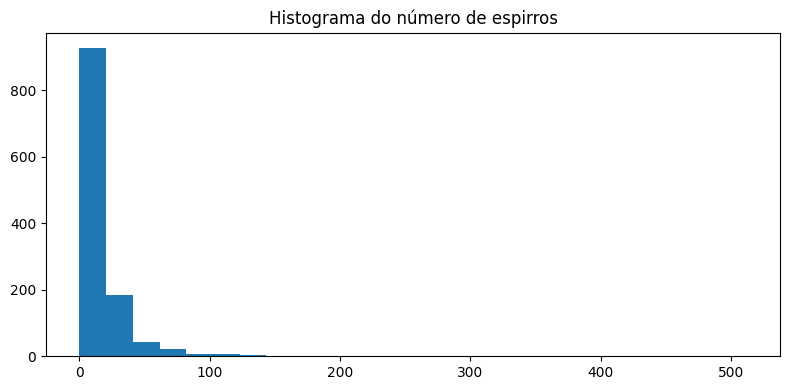

In [7]:
print( f"O número médio de espirros foi de {df[ 'nsneeze' ].mean()}, já o número mediano foi de {df[ 'nsneeze' ].median()}" )

print( f" O desvio padrão no número de espirros foi de {np.std( df[ 'nsneeze' ] )}, o número minimo foi de {np.min( df[ 'nsneeze' ] )} e o máximo foi de {np.max( df[ 'nsneeze' ] )}" )

plt.figure( figsize = ( 8,4) )
plt.hist( df[ 'nsneeze' ], bins = 25 )
plt.title( "Histograma do número de espirros" )
plt.tight_layout()
plt.show()

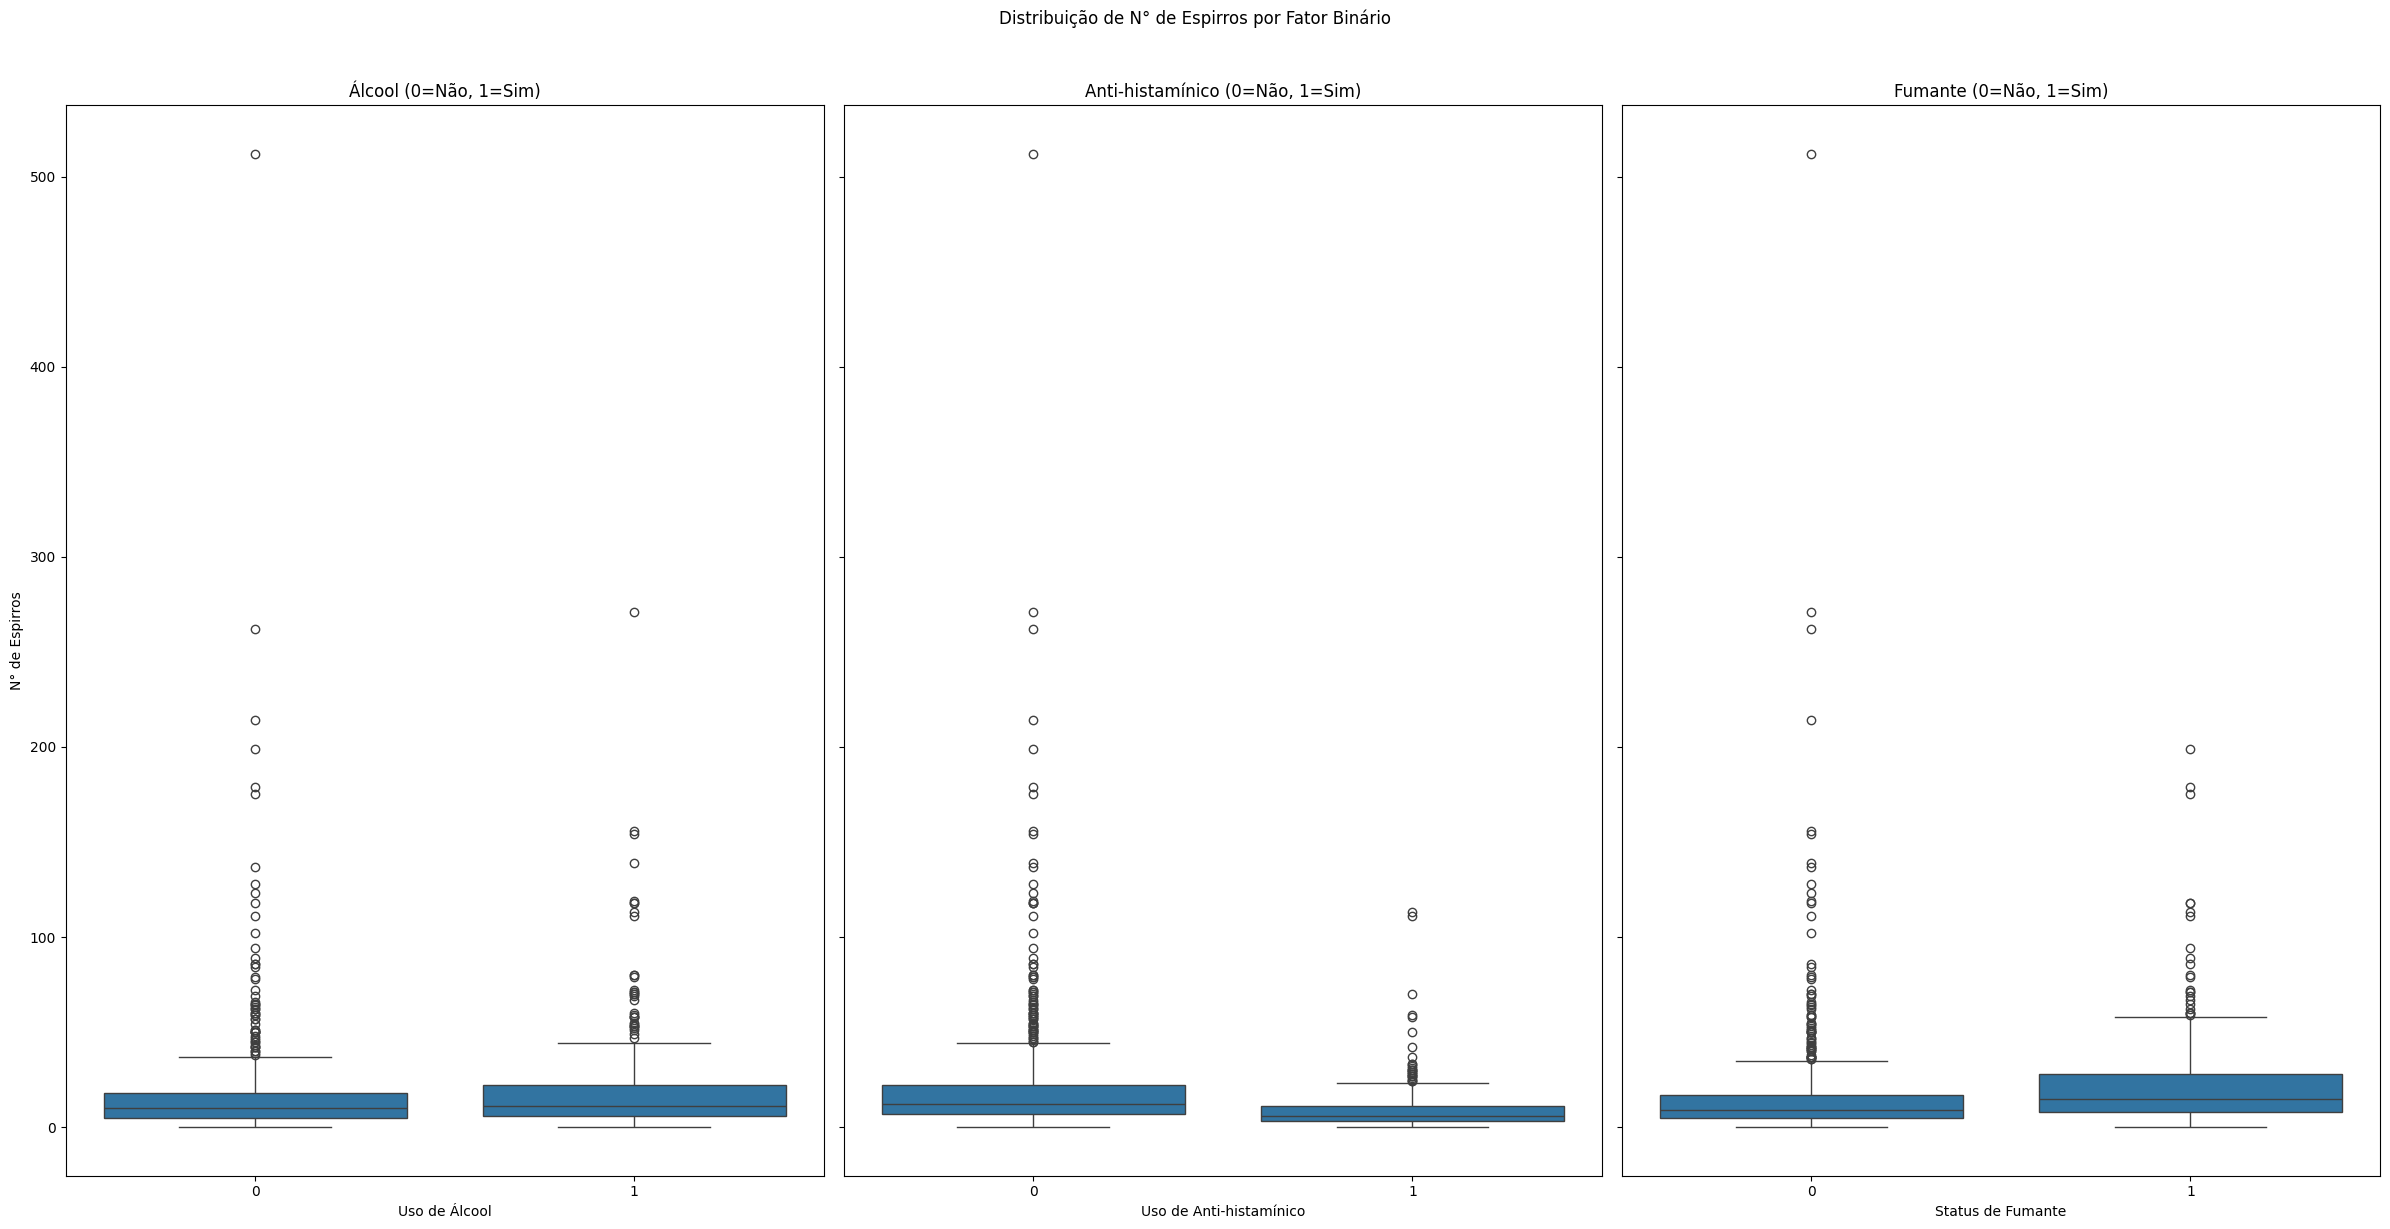

In [3]:
fig, axes = plt.subplots( 1, 3, figsize = ( 24, 12 ), sharey = True )

sns.boxplot( x = 'alcohol', y = 'nsneeze', data = df, ax = axes[ 0 ] )
axes[ 0 ].set_title( 'Álcool (0=Não, 1=Sim)' )
axes[ 0 ].set_xlabel( "Uso de Álcool" )
axes[ 0 ].set_ylabel( "N° de Espirros" )

sns.boxplot( x = 'antihist', y = 'nsneeze', data = df, ax = axes[ 1 ] )
axes[ 1 ].set_title( 'Anti-histamínico (0=Não, 1=Sim)' )
axes[ 1 ].set_xlabel( "Uso de Anti-histamínico" )
axes[ 1 ].set_ylabel("")

sns.boxplot( x = 'smoker', y = 'nsneeze', data = df, ax = axes[ 2 ] )
axes[ 2 ].set_title( 'Fumante (0=Não, 1=Sim)' )
axes[ 2 ].set_xlabel( "Status de Fumante" )
axes[ 2 ].set_ylabel("")

plt.suptitle( "Distribuição de N° de Espirros por Fator Binário", y = 1.02 )
plt.tight_layout()
plt.show()


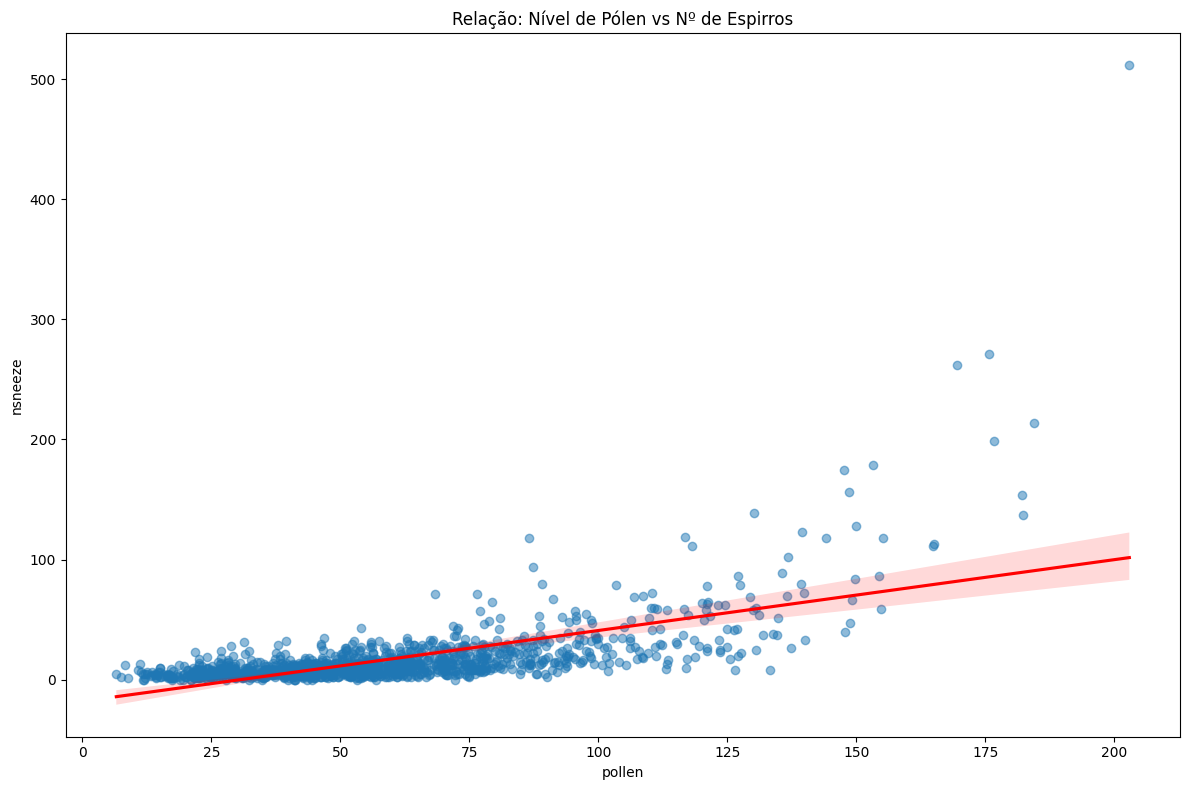

In [7]:
plt.figure( figsize = ( 12,8 ) )

# Removi o "ax = axes[1]"
sns.regplot( x = 'pollen', y = 'nsneeze', data = df, scatter_kws = {'alpha':0.5}, line_kws = {'color':'red'} )

plt.title( 'Relação: Nível de Pólen vs Nº de Espirros' )
plt.tight_layout()
plt.show()

O histograma mostra que a frequência de espirros é altamente assimétrica à direita, isto é, a grande maioria espirra pouco. No entanto existe outliers, como visto que o número máximo de espirros foi de 512.

Nos boxplots, no caso do álcool não aparenta ter tanta influência assim, já que ambos tem grande sobreposição. No caso do uso de Anti-Histamínico, aparentemente reduz a mediana de espirros. Por último, o fato de fumar aparenta aumentar o número mediano de espirros.

O scatterplot mostra que o nível de pólen no ar está associado positivamente com o número de espirros no dia. 

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.


In [ ]:
resposta = df['nsneeze']
preditoras = df[['alcohol', 'antihist', 'smoker', 'age', 'pollen']]

In [ ]:
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

modelo_pois = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.Poisson()
)

ajuste_pois = modelo_pois.fit()
print(ajuste_pois.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1200
Model:                            GLM   Df Residuals:                     1194
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4947.1
Date:                Wed, 26 Nov 2025   Deviance:                       4949.1
Time:                        00:18:30   Pearson chi2:                 5.04e+03
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5560      0.026  

O modelo final ajustado foi $log(\mu_i) = 1.5560 + 0.2191 * alcohol - 0.6449 * antihist + 0.4639 * smoker - 0.0114 * age + 0.0229 * pollen$

Note que, para todos os coeficientes, o p-valor é $0.000$. Dessa forma, considerando um nível de significância $\alpha = 0.05$, rejeitamos a hipótese de que cada um dos coeficientes não são significativos (ou seja, os coeficientes são significativos estatisticamente para o modelo).

Podemos calcular a razão de taxas ($\exp(\beta_j) = \frac{\mu_i(x_j + 1)}{\mu_i(x_j)}$) para cada uma das variáveis a fim de ajudar na interpretação do modelo.

| Variável | Coeficiente ($\hat{\beta}$) | Razão de Taxas $\exp(\hat{\beta})$ | Interpretação da Taxa de Espirros ($\mu$) |
| :--- | :---: | :---: | :--- |
| **Intercepto** | $1.5560$ | $4.74$ | Contagem esperada de espirros para o grupo de referência. |
| **alcohol** | $+0.2191$ | $1.24$ | Contagem esperada de espirros é 24% maior com o consumo de álcool. |
| **antihist** | $-0.6449$ | $0.52$ | Contagem esperada de espirros é 48% menor ao tomar anti-histamínico. |
| **smoker** | $+0.4639$ | $1.59$ | Contagem esperada de espirros é 59% maior em fumantes. |
| **age** | $-0.0114$ | $0.99$ | Contagem esperada de espirros diminui aproximadamente 1% a cada ano de vida. |
| **pollen** | $+0.0229$ | $1.02$ | Contagem esperada de espirros aumenta aproximadamente 2% por unidade de pólen. |



**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


Podemos utilizar a função desvio (Deviance) para medir o quão mal o modelo se ajusta aos dados em comparação com o modelo saturado. Em um modelo Poisson, a razão do desvio pelos seus graus de liberdade deve ser aproximadamente 1. Veja a seguir que isso não acontece, essa razão é bem maior que 1, indicando superdispersão

In [ ]:
deviance = ajuste_pois.deviance
df_resid = ajuste_pois.df_resid

dispersion = deviance / df_resid

print( f" O parâmentro de dispersão phi (deviance) = {dispersion}" )

 O parâmentro de dispersão phi (deviance) = 4.14498189596043


Uma outra maneira de checar se o modelo é adequado em termos de dispersão é fazer o qq-plot dos resíduos junto ao seu gráfico de envelope:

In [ ]:
def envelope_poisson(fitted_model, X, title):
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    sim_resid = []
    for _ in range(100):
        mu_sim = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
        y_sim = np.random.poisson(mu_sim)
        sim_model = sm.GLM(y_sim, X, family=sm.families.Poisson()).fit()
        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, 'o', label="Resíduos observados")
    plt.plot(lower, 'r--', linewidth=1, label="banda 2.5%")
    plt.plot(upper, 'r--', linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)

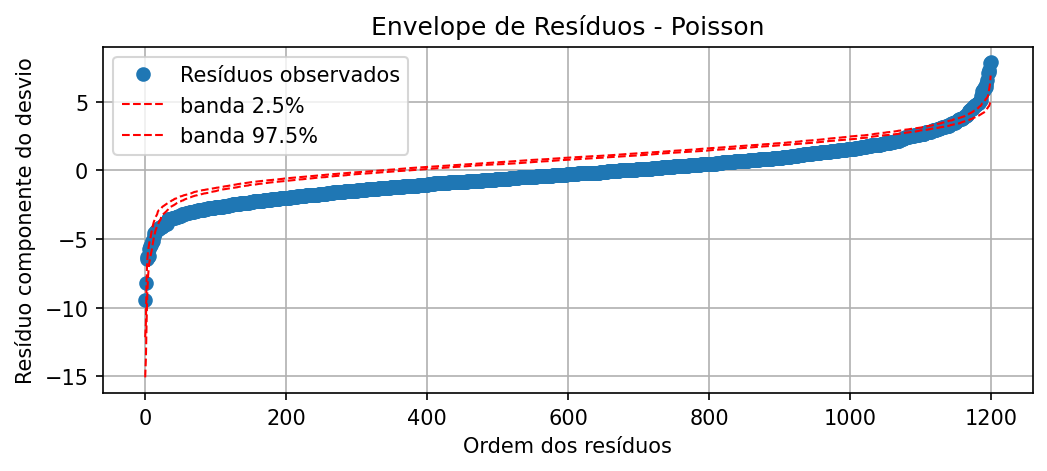

In [ ]:
results = ajuste_pois
X = preditoras
plt.figure(figsize=(8, 3), dpi=150)
envelope_poisson(results, X, "Envelope de Resíduos - Poisson")

Note que basicamente todos os resíduos caem fora do envelope, indicando um caso muito claro de superdispersão

**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

alpha_fixado = 0.23

#alpha para sneeze1 a sneeze5 = 0.23, 0.3, 0.25,  0.2, 0.2

modelo_nb = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.NegativeBinomial(alpha=alpha_fixado)
)

ajuste_nb = modelo_nb.fit()
print(ajuste_nb.summary())

alpha_usado = ajuste_nb.family.alpha
print("Alpha usado no modelo:", alpha_usado)

alpha_est = ajuste_nb.params.iloc[-1]
print("Alpha estimado:", alpha_est)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1200
Model:                            GLM   Df Residuals:                     1194
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3849.6
Date:                Wed, 26 Nov 2025   Deviance:                       1180.2
Time:                        00:18:31   Pearson chi2:                 1.13e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9259
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5624      0.062  

Comparando os resíduos, note que o desvio para o modelo poisson foi de $4949.1$, enquanto o desvio para o modelo binomial-negativa foi de $1180.2$. Sendo assim, essa métrica indica que o segundo modelo é bem mais apropriado para o conjunto de dados (quanto menor o desvio, melhor, já que estamos comparando com o modelo saturado, que explica toda a variabilidade dos dados), já que explica melhor a variabilidade dos dados em relação ao primeiro modelo.

In [ ]:
print( f"O AIC do modelo poisson foi de {ajuste_pois.aic}" )
print( f"O AIC do modelo binomial-negativa foi de {ajuste_nb.aic}" )


O AIC do modelo poisson foi de 9906.278039413422
O AIC do modelo binomial-negativa foi de 7711.282894186837


Comparando o critério AIC, o modelo binomial-negativa também se deu melhor. Esse critério serve para comparar modelos levando em consideração a complexidade e o ajuste. Quanto menor, melhor


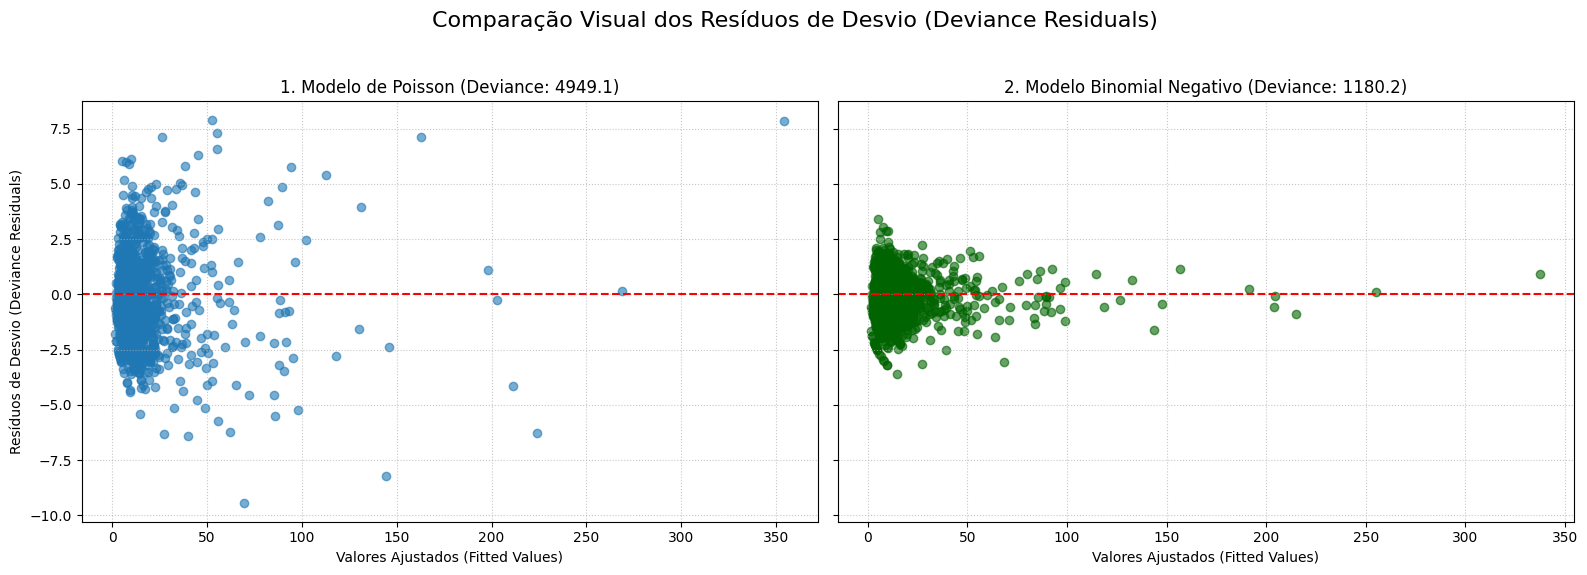

In [ ]:
fig, axes = plt.subplots( 1, 2, figsize = ( 16, 6 ), sharey = True )
fig.suptitle( 'Comparação Visual dos Resíduos de Desvio (Deviance Residuals)', fontsize = 16 )

axes[0].scatter( ajuste_pois.fittedvalues, ajuste_pois.resid_deviance, alpha = 0.6 )
axes[0].axhline( 0, color = 'r', linestyle='--' )
axes[0].set_title( f'1. Modelo de Poisson (Deviance: {ajuste_pois.deviance:.1f})' )
axes[0].set_xlabel( 'Valores Ajustados (Fitted Values)' )
axes[0].set_ylabel( 'Resíduos de Desvio (Deviance Residuals)' )
axes[0].grid( True, linestyle = ':', alpha = 0.7 )


axes[1].scatter( ajuste_nb.fittedvalues, ajuste_nb.resid_deviance, alpha = 0.6, color = 'darkgreen' )
axes[1].axhline( 0, color = 'r', linestyle = '--' )

axes[1].set_title( f'2. Modelo Binomial Negativo (Deviance: {ajuste_nb.deviance:.1f})' )
axes[1].set_xlabel( 'Valores Ajustados (Fitted Values)' )
axes[1].set_ylabel('') # Eixo Y compartilhado
axes[1].grid( True, linestyle = ':', alpha = 0.7 )

plt.tight_layout( rect = [ 0, 0.03, 1, 0.95 ] )
plt.show()

Interpretação dos gráficos: 

No modelo poisson vemos uma dispersão muito grande nos resíduos (de -10 até +8 aproximadamente) e aparentemente não são homocedásticos, já que a variância parece aumentar conforme os valores aumentam. Sendo assim, os gráficos ajudam a comprovar o que já foi visto nos procedimentos de comparação anteriores (critério AIC e função desvio).

No modelo binomial-negativa, a dispersão dos resíduos parece mais controlada (entre -3 e 3 aproximadamente) e além disso aparenta alcançar a homocedasticidade, já que não há um aumento na dispersão conforme os valores aumentam.

Sendo assim, após toda essa análise, fica evidente que para esses dados o modelo binomial-negativa é melhor, uma vez que supera o modelo poisson em todas as métricas.



**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


In [ ]:
def envelope_negbin(fitted_model, title):
    # resíduos observados
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    # matriz de design e parâmetros do próprio modelo
    X = fitted_model.model.exog
    mu = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
    alpha = fitted_model.family.alpha

    sim_resid = []
    for _ in range(100):
        # simula Y ~ NB(mu, alpha) com a mesma parametrização
        n_sim = 1 / alpha
        p_sim = n_sim / (n_sim + mu)
        y_sim = np.random.negative_binomial(n=n_sim, p=p_sim)

        sim_model = sm.GLM(
            y_sim,
            X,
            family=sm.families.NegativeBinomial(alpha=alpha)
        ).fit()

        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, "o", label="Resíduos observados")
    plt.plot(lower, "r--", linewidth=1, label="banda 2.5%")
    plt.plot(upper, "r--", linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)


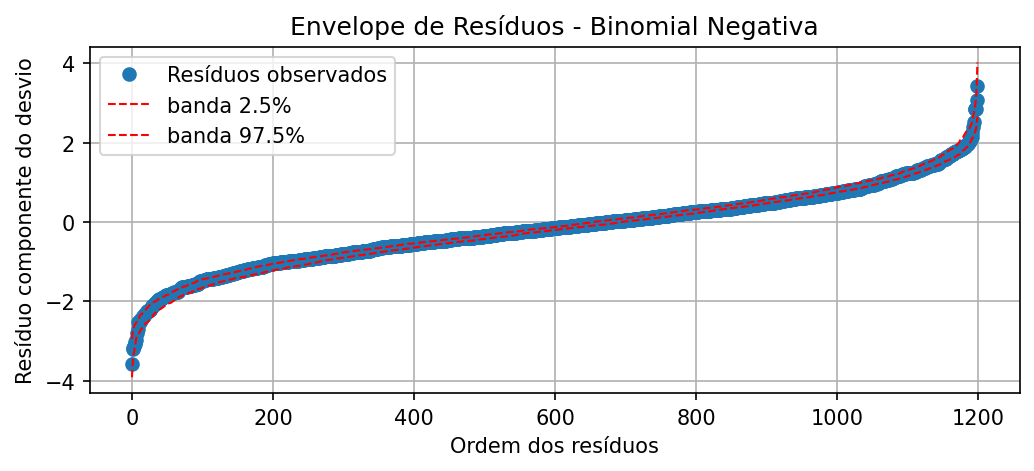

In [ ]:
results_nb = ajuste_nb

plt.figure(figsize=(8, 3), dpi=150)
envelope_negbin(results_nb, "Envelope de Resíduos - Binomial Negativa")

In [ ]:
ame = ajuste_nb.get_margeff( at = 'overall', method = 'dydx', dummy = True )

print( ame.summary() )

         GLM Marginal Effects        
Dep. Variable:                nsneeze
Method:                          dydx
At:                           overall
                      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
C(alcohol)[T.1]      3.7788      0.669      5.649      0.000       2.468       5.090
C(antihist)[T.1]    -9.3827      0.521    -18.018      0.000     -10.403      -8.362
C(smoker)[T.1]       9.6788      0.957     10.118      0.000       7.804      11.554
age                 -0.1854      0.022     -8.380      0.000      -0.229      -0.142
pollen               0.3845      0.016     24.467      0.000       0.354       0.415


Interpretações:

Mantendo as outras variáveis constantes, o consumo de álcool se associa com um aumento médio de 3.78 espirros;

Mantendo as outras variáveis constantes, o uso de anti-histamínico se associa com uma diminuição média de 9.38 espirros; 

Mantendo as outras variáveis constantes, o fato da pessoa fumar se associa com um aumento médio de 9.67 espirros;

Mantendo as outras variáveis constantes, o aumento de 1 ano na idade está relacionado com uma diminuição média de 0.18 espirros;

Mantendo as outras variáveis constantes, o aumento de 1 unidade na concentração de pólen no ar está relacionada com um aumento médio de 0.38 espirros.

Observação: Note que o gráfico dos resíduos do modelo binomial-negativa está inteiramente dentro do envelope, mostrando que o ajuste foi bom

**6.** Separe os dados em dois subconjuntos, treinamento com 80% das observações e
teste com 20%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (desvio, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).



In [ ]:

train, test = train_test_split( df, test_size = 0.20, random_state = 42 ) #fixei a seed só para manter a conclusão caso rode denovo

print( f"Observações de Treino: {len(train)}" )
print( f"Observações de Teste: {len(test)}" )

formula = 'nsneeze ~ alcohol + antihist + smoker + age + pollen'

model_pois_train = smf.glm( formula = formula, data = train, family = sm.families.Poisson() ).fit()

model_nb_train = smf.glm( formula = formula, data = train, family = sm.families.NegativeBinomial() ).fit()

pred_pois = model_pois_train.predict( test )
pred_nb = model_nb_train.predict( test )

y_true = test[ 'nsneeze' ]

mse_pois = mean_squared_error( y_true, pred_pois )
mae_pois = mean_absolute_error( y_true, pred_pois )

mse_nb = mean_squared_error( y_true, pred_nb )
mae_nb = mean_absolute_error( y_true, pred_nb )

print( f"Modelo Poisson:" )
print( f"EQM (Erro Quadrático Médio): {mse_pois:.4f}" )
print( f"EAM (Erro Absoluto Médio):   {mae_pois:.4f}" )
print( f"Modelo Binomial Negativo:" )
print( f"EQM (Erro Quadrático Médio): {mse_nb:.4f}" )
print( f"EAM (Erro Absoluto Médio):   {mae_nb:.4f}" )

Observações de Treino: 960
Observações de Teste: 240
COMPARAÇÃO DE DESEMPENHO PREDITIVO (FORA DA AMOSTRA)
Modelo Poisson:
  - EQM (Erro Quadrático Médio): 260.0507
  - EAM (Erro Absoluto Médio):   7.0184
Modelo Binomial Negativo:
  - EQM (Erro Quadrático Médio): 244.1237
  - EAM (Erro Absoluto Médio):   6.9660


/home/gabriel/Documentos/ESTUDOS/6_semestre/Avaliacao2/.venv/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


O modelo binomial-negativo apresentou desempenho superior em ambos os critérios.

O Erro Quadrático Médio (EQM) caiu de 260.05 (poisson) para 244.12 (binomial negativo). Como o EQM penaliza erros maiores, essa redução indica que o modelo binomial negativo é muito mais robusto na previsão de valores extremos e na captura da variabilidade dos dados (superdispersão).

No Erro Absoluto Médio (EAM), a diferença foi pequena (7.01 vs 6.96). No entanto, a consistência dos resultados confirma a escolha feita anteriormente: a superioridade do modelo binomial-negativo nos critérios de ajuste (AIC, Desvio) se traduz em uma maior capacidade preditiva."

**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.

In [ ]:
pollen_baixo = df[ 'pollen' ].quantile( 0.25 )
pollen_alto = df[ 'pollen' ].quantile( 0.75 )

print( f"Considerando Pólen Baixo (Q1) = {pollen_baixo:.2f}" )
print( f"Considerando Pólen Alto (Q3)  = {pollen_alto:.2f}" )

perfis = pd.DataFrame( {
    'alcohol':  [ 0, 1 ],            
    'antihist': [ 1, 0 ],             
    'smoker':   [ 0, 1 ],             
    'age':      [ 30, 50 ],           
    'pollen':   [ pollen_baixo, pollen_alto ]
}, index = [ 'Indivíduo A', 'Indivíduo B' ] )

predicoes = ajuste_nb.predict( perfis )

for individuo, espirros in predicoes.items():
    print( f"{individuo}: {espirros:.2f} espirros esperados" )

Considerando Pólen Baixo (Q1) = 38.02
Considerando Pólen Alto (Q3)  = 74.42
Indivíduo A: 4.16 espirros esperados
Indivíduo B: 30.01 espirros esperados
